# Análisis Exploratorio de Datos
Se procede a realizar el análisis exploratorio de datos, vamos a utilizar el data set Movies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Realizar la lectura del archivo
movies = pd.read_csv(r"")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8704 entries, 0 to 8703
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             8704 non-null   float64
 1   id                 8704 non-null   int64  
 2   original_language  8704 non-null   object 
 3   overview           8582 non-null   object 
 4   popularity         8704 non-null   float64
 5   release_date       8704 non-null   object 
 6   revenue            8704 non-null   float64
 7   runtime            8679 non-null   float64
 8   spoken_languages   8704 non-null   object 
 9   status             8697 non-null   object 
 10  tagline            4420 non-null   object 
 11  title              8704 non-null   object 
 12  vote_average       8704 non-null   float64
 13  vote_count         8704 non-null   float64
 14  id_collections     705 non-null    float64
 15  name_collections   705 non-null    object 
 16  genre_1_name       8535 

In [5]:
#Se verifican los status de las películas
movies["status"].unique()

array(['Released', 'Rumored', nan, 'Post Production', 'In Production',
       'Planned'], dtype=object)

In [6]:
#Se procede a filtrar solo por las películas en status "released"
movies = movies[movies["status"] == "Released"]
movies.__len__()

8582

# Análisis Descriptivo
Se procede a realizar el análisis descriptivo de la información en Movies

In [7]:
#Vamos a describir la variable vote_average
movies["vote_average"].describe(include="all")

count    8582.000000
mean        5.741074
std         1.583943
min         0.000000
25%         5.100000
50%         5.900000
75%         6.700000
max        10.000000
Name: vote_average, dtype: float64

In [8]:
# Vamos a describir el promedio de vote_average por tipo de genero (Tomaremos el genero 1 como principal)
a = movies.groupby(["genre_1_name"])["vote_average"].mean().reset_index()
a = pd.DataFrame(a)
a = a.rename(columns={"genre_1_name":"genero"}) #Ajustamos el nombre de la columna a genero
a = a.sort_values(by="vote_average", ascending= False)
a

,genero,vote_average
12,Music,6.500000
10,History,6.451111
9,Foreign,6.442857
2,Animation,6.360352
5,Documentary,6.299085
6,Drama,5.956752
18,War,5.926000
14,Romance,5.920588
1,Adventure,5.839631
7,Family,5.813235


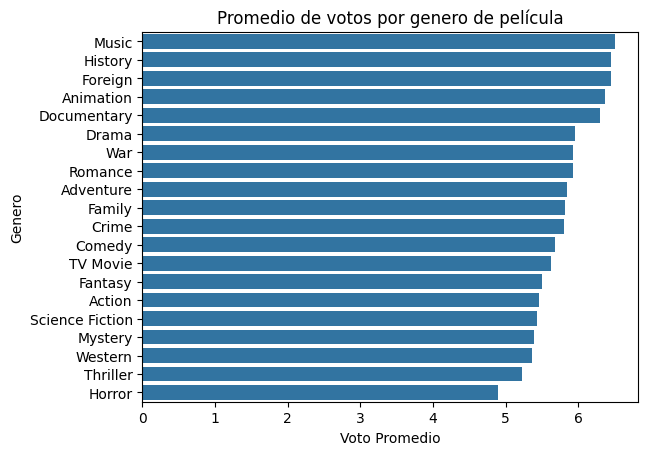

In [9]:
#Se procede a graficar el histograma del promedio de votaciones por genero
sns.barplot(x="vote_average", y="genero", data=a)  # Grafico de barras votos promedio por genero
plt.title("Promedio de votos por genero de película")
plt.xlabel("Voto Promedio")
plt.ylabel("Genero")
plt.show()

De acuerdo con lo desplegado en el gráfico los generos de películas con mayores votos promedio son: Animation, Music, Documentary y War

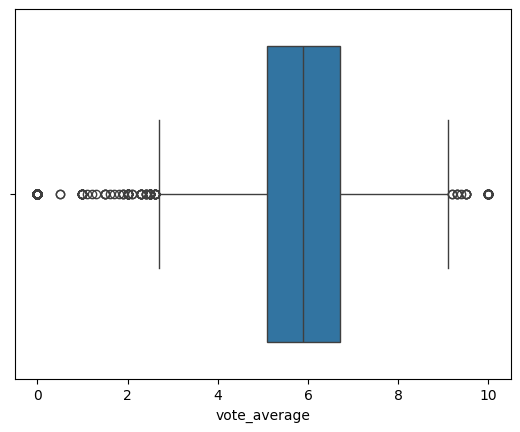

In [10]:
#Vamos a hacer un grafico de Cajas para la variable vote_average
sns.boxplot(x=movies["vote_average"])
plt.show()

Se evidencia en el grafico, siguiendo con la regla de Boxplot, que hay valores de votaciones atipicas por fuera del límite superior, es decir, más altas que el resto, y votaciones por debajo del limite inferior, más bajas que el resto. Sin embargo, se logra validar la coherencia de esta variable porque se encuentran en el rango de puntaje de 0 a 10, indicando que no hay registros de votaciones erroneas.

In [11]:
#Vamos a describir la variable revenue
pd.set_option('display.float_format', '{:.2f}'.format) #Para eliminar la notación cientifica y ver mejor los valores
movies["revenue"].describe(include="all")

count         8582.00
mean      21285263.43
std      102285987.99
min              0.00
25%              0.00
50%              0.00
75%              0.00
max     2068223624.00
Name: revenue, dtype: float64

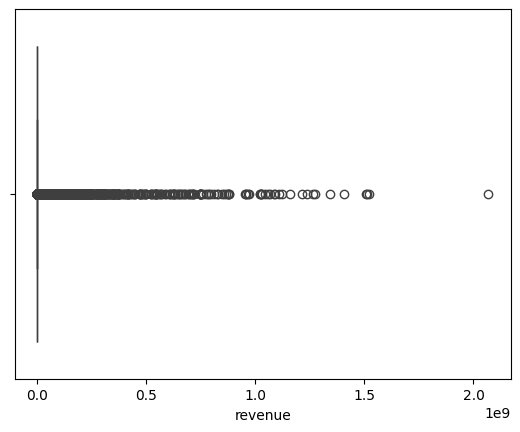

In [12]:
#Por evidenciarse una desviación estandar muy alta, 
#vamos a realizar el grafico de Cajas para validar datos atipicos en esta variable
sns.boxplot(x=movies["revenue"])
plt.show()

In [13]:
#Vamos a marcar en el data set los valores atipicos de revenue
q1= np.quantile(movies["revenue"], 0.25)
q3 = np.quantile(movies["revenue"], 0.75)
irq = q3 -q1
limite_sup = q3 +(1.5*irq) 
print(f"el limite superior es: {limite_sup}")

el limite superior es: 0.0


In [16]:
#Vamos a crear un nuevo data set filtrando solo los revenue que se encuentran por debajo del límite superior con boxplot
movies_r = movies[movies["revenue"]<= limite_sup]
movies_r.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,6751.00,6751.00,6751.00,6751.00,6728.00,6751.00,6751.00,394.00,6751.00,6751.00
mean,820447.66,227621.36,2.68,0.00,88.86,5.61,38.10,252903.76,2013.34,0.00
std,4594357.94,121413.52,3.51,0.00,35.86,1.71,84.56,135399.66,2.04,0.00
min,0.00,7978.00,0.00,0.00,0.00,0.00,0.00,2150.00,2010.00,0.00
25%,0.00,110468.50,0.61,0.00,83.00,4.90,5.00,129526.75,2012.00,0.00
50%,0.00,238185.00,1.49,0.00,90.00,5.80,13.00,256287.00,2013.00,0.00
75%,0.00,333384.50,3.53,0.00,100.00,6.70,36.00,370374.00,2015.00,0.00
max,150000000.00,465044.00,78.81,0.00,900.00,10.00,1708.00,480160.00,2017.00,0.00


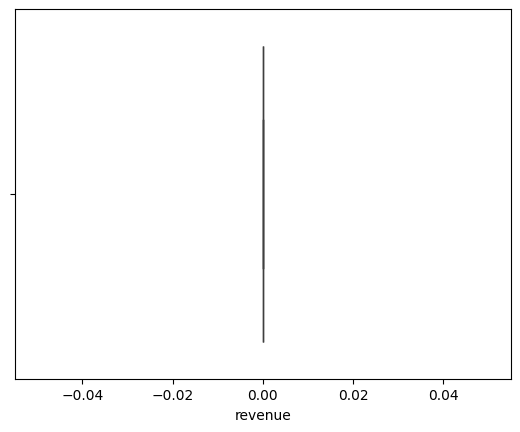

In [17]:
#Realizamos un diagrama boxplot con los nuevos datos filtrados
sns.boxplot(x=movies_r["revenue"])
plt.show()

In [14]:
# Se filtran también los datos que se encuentran por encima del linmite superior para ver su descripción
movies_ra = movies[movies["revenue"]> limite_sup]
movies_ra.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,1831.00,1831.00,1831.00,1831.00,1830.00,1831.00,1831.00,304.00,1831.00,1831.00
mean,31907243.02,165935.41,11.39,99765227.05,105.74,6.21,949.32,184381.88,2013.14,2069.51
std,49792788.05,112671.87,19.63,203039888.76,18.26,0.84,1508.70,141144.83,2.10,68497.24
min,0.00,189.00,0.01,1.00,0.00,0.00,0.00,10.00,2010.00,0.00
25%,0.00,63815.00,5.89,1070642.00,94.00,5.70,102.50,77816.00,2011.00,0.00
50%,12000000.00,136835.00,8.68,17834867.00,103.00,6.20,359.00,150967.00,2013.00,1.08
75%,37500000.00,264658.00,12.46,97877051.50,116.00,6.80,1092.00,290150.75,2015.00,3.00
max,380000000.00,443319.00,547.49,2068223624.00,338.00,8.60,14075.00,479888.00,2017.00,2755584.00


De acuerdo a la información descriptiva de las películas con revenue por encima del limite superior por boxplot, se evidencia que cuentan con mayores budget, return y popularity que las películas filtradas en el paso anterior(revenue por debajo del limite superior por boxplot)

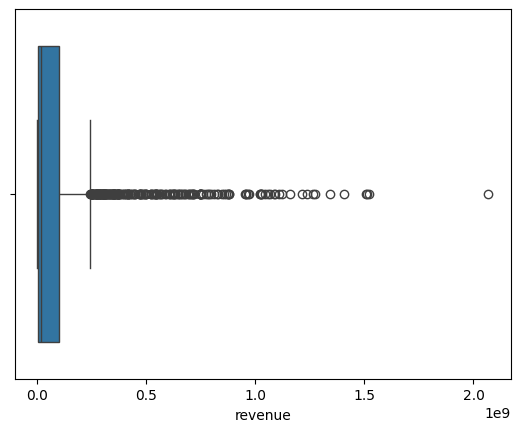

In [15]:
#Realizamos un diagrama boxplot con los nuevos datos filtrados
sns.boxplot(x=movies_ra["revenue"])
plt.show()

In [16]:
#Vamos a analizar el promedio de revenue por genero
b = movies.groupby(["genre_1_name"])["revenue"].mean().reset_index()
b = pd.DataFrame(b)
b = b.rename(columns={"genre_1_name":"genero", "revenue":"revenue_prom"}) #Ajustamos el nombre de la columna a genero
b = b.sort_values(by="revenue_prom", ascending= False)
b

,genero,revenue_prom
1,Adventure,114894742.69
0,Action,82334247.74
2,Animation,82083272.75
7,Family,63010071.77
15,Science Fiction,62513768.24
8,Fantasy,54915133.92
19,Western,23321913.17
18,War,22662758.08
4,Crime,17310489.84
10,History,16430232.27


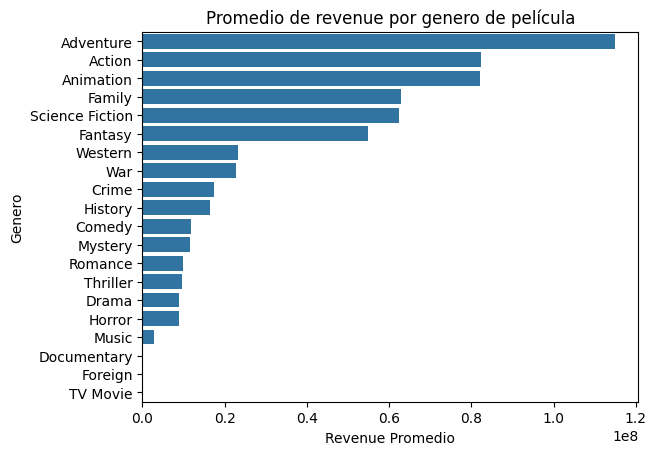

In [17]:
#Se procede a graficar el histograma del promedio de revenue por genero
sns.barplot(x="revenue_prom", y="genero", data=b)  # Grafico de barras votos promedio por genero
plt.title("Promedio de revenue por genero de película")
plt.xlabel("Revenue Promedio")
plt.ylabel("Genero")
plt.show()

Las peliculas de genero Avernture, Animation, Action y Fantasy, tienen los mayores promedio de revenue, siendo el más alto para el genero Adventure. Animation se encuentra de segundo puesto y a su vez es el genero con uno de los mayores puntajes promedio. Por otra parte Documentary es de los generos con mejores revenue promedio, sin embargo, se encontraba en el top de los generos con mayores puntajes.

In [18]:
# Se procede a realizar un análisis de la variable budget
movies["budget"].describe()

count        8582.00
mean      7452925.21
std      26600009.07
min             0.00
25%             0.00
50%             0.00
75%        100000.00
max     380000000.00
Name: budget, dtype: float64

In [19]:
#Se evidencia similar comportamiento que con la variable revenue
#Se filtraran los datos por datos con solo valores atipicos y datos sin valores atipicos
q1b = np.quantile(movies["budget"], 0.25)
q3b = np.quantile(movies["budget"], 0.75)
irqb = q3b-q1b
limite_supb= q3b + (1.5*irqb)
print(f"El limite superior es {limite_supb}")

El limite superior es 250000.0


In [20]:
#Filtramos los datos sin atipicos
movies_b = movies[movies["budget"]<= limite_supb]
movies_b.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,6486.00,6486.00,6486.00,6486.00,6463.00,6486.00,6486.00,352.00,6486.00,6486.00
mean,1900.67,228143.71,2.74,388817.89,88.72,5.69,41.89,263614.80,2013.36,583.54
std,17418.14,120461.87,3.49,4553437.43,35.37,1.71,90.18,135104.18,2.03,36398.72
min,0.00,11403.00,0.00,0.00,0.00,0.00,0.00,2150.00,2010.00,0.00
25%,0.00,112573.25,0.59,0.00,83.00,5.00,5.00,147487.25,2012.00,0.00
50%,0.00,239564.00,1.49,0.00,90.00,5.90,14.00,260601.00,2013.00,0.00
75%,0.00,333091.75,3.69,0.00,100.00,6.70,38.00,386162.00,2015.00,0.00
max,250000.00,465044.00,67.96,233755553.00,900.00,10.00,1660.00,480160.00,2017.00,2755584.00


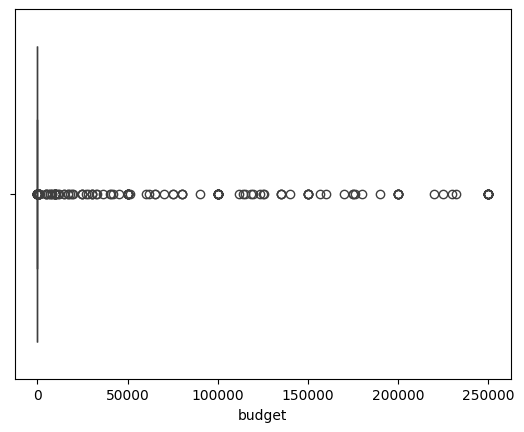

In [21]:
#Realizamos un diagrama boxplot con los nuevos datos filtrados
sns.boxplot(x=movies_b["budget"])
plt.show()

Como se evidencia los datos aún sin atipicos, siguen siendo muy dispersos.

In [22]:
#Se procede a realizar un análisis de solo los valores atipicos en budget
movies_ba = movies[movies["budget"]> limite_supb]
movies_ba.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,2096.00,2096.00,2096.00,2096.00,2095.00,2096.00,2096.00,346.00,2096.00,2096.00
mean,30509864.71,172118.05,10.09,85948596.33,104.03,5.91,822.37,181802.79,2013.09,2.13
std,46844105.56,117936.53,18.71,193013172.34,24.13,1.10,1447.89,136967.04,2.13,5.06
min,264000.00,189.00,0.01,0.00,0.00,0.00,0.00,10.00,2010.00,0.00
25%,4000000.00,65728.00,3.94,0.00,92.00,5.30,40.00,86066.00,2011.00,0.00
50%,11000000.00,138459.50,7.68,5647057.00,101.00,6.00,230.00,140794.00,2013.00,0.51
75%,34000000.00,273896.00,11.60,78167100.75,113.00,6.70,917.00,284433.00,2015.00,2.59
max,380000000.00,460846.00,547.49,2068223624.00,540.00,10.00,14075.00,479888.00,2017.00,101.76


Se evidencia que aquí en estos datos, se encuentran peliculas con valores más altos de revenue y de popularidad que los datos sin atipicos en budget.

In [23]:
#Vamos a analizar el promedio de budget por genero
c = movies.groupby(["genre_1_name"])["budget"].mean().reset_index()
c = pd.DataFrame(c)
c = c.rename(columns={"genre_1_name":"genero", "budget":"budget_prom"}) #Ajustamos el nombre de la columna a genero
c = c.sort_values(by="budget_prom", ascending= False)
c

,genero,budget_prom
1,Adventure,41417275.97
0,Action,28434615.71
8,Fantasy,22951798.48
2,Animation,21866687.72
15,Science Fiction,15789941.94
7,Family,14012921.50
18,War,10567203.92
4,Crime,9354129.94
19,Western,8239130.43
3,Comedy,4633872.60


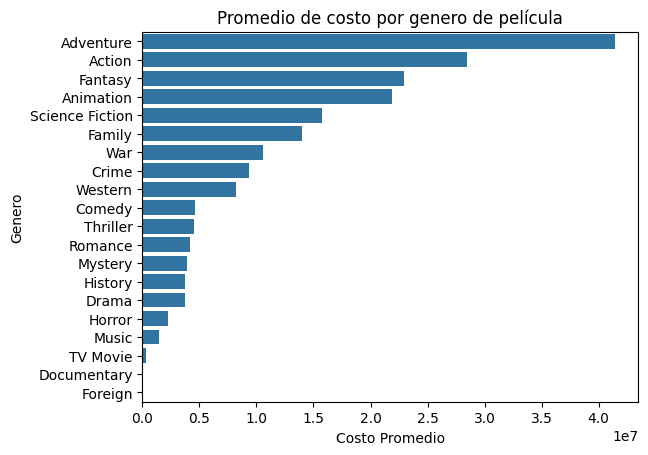

In [24]:
#Se procede a graficar el histograma del promedio de budget por genero
sns.barplot(x="budget_prom", y="genero", data=c)  # Grafico de barras votos promedio por genero
plt.title("Promedio de costo por genero de película")
plt.xlabel("Costo Promedio")
plt.ylabel("Genero")
plt.show()

Las películas de genero Adventure, Action, Animation y Fantasy, tienen los mayores promedios de budget, coincidente con las películas que tienen los mayores revenue promedio, sigue siendo el más alto costo para el genero Adventure, igual que el revenue.

In [25]:
#Vamos a analizar la variable popularidad
movies["popularity"].describe()

count   8582.00
mean       4.54
std       10.23
min        0.00
25%        0.79
50%        2.15
75%        6.21
max      547.49
Name: popularity, dtype: float64

In [26]:
# Vamos a determinar el valor promedio de popularidad por genero de película
d = movies.groupby(["genre_1_name"])["popularity"].mean().reset_index()
d = pd.DataFrame(d)
d = d.rename(columns={"genre_1_name":"genero", "popularity":"popularity_prom"}) #Ajustamos el nombre de la columna a genero
d = d.sort_values(by="popularity_prom", ascending= False)
d

,genero,popularity_prom
7,Family,10.30
1,Adventure,9.50
0,Action,8.82
15,Science Fiction,8.12
13,Mystery,6.03
2,Animation,5.91
4,Crime,5.89
8,Fantasy,5.86
17,Thriller,5.05
18,War,4.91


Las películas con mayor popularidad son de tipo adventure, las películas de este genero se encuentran entre los valores más altos de budget, revenue y vote_average.

In [27]:
movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'id_collections',
       'name_collections', 'genre_1_name', 'genre_2_name', 'genre_3_name',
       'companies_1_name', 'companies_2_name', 'companies_3_name',
       'country_1_name', 'country_2_name', 'country_3_name', 'language_1_iso',
       'language_1_name', 'language_2_iso', 'language_2_name',
       'language_3_iso', 'language_3_name', 'release_year', 'return'],
      dtype='object')

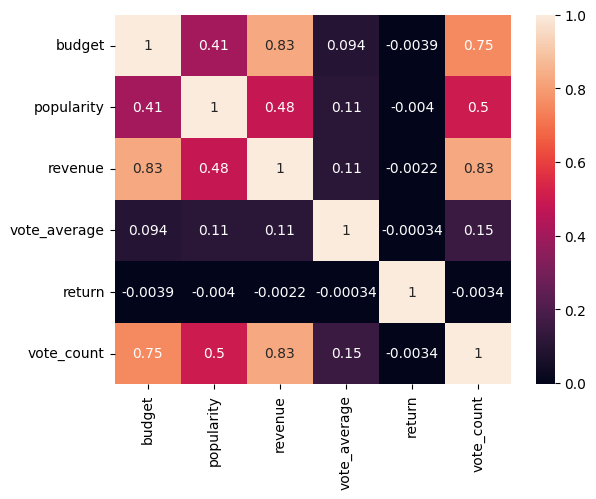

In [28]:
#Se procede a realizar una matriz de correlación con las variables númericas
sns.heatmap(movies[['budget','popularity','revenue', "vote_average", "return", "vote_count"]].corr(), annot=True)
plt.show()

De acuerdo con la matriz de correlación las variables revenue- budget ,  revenue - popularity  y budget - popularity tienen una relación lineal. 

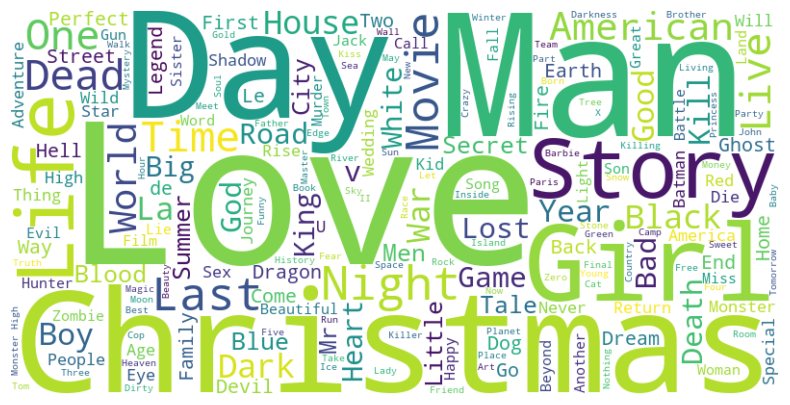

In [18]:
#Vamos a analizar la variable tittle
#Vamos a usar nube de palabras
from wordcloud import WordCloud
# Extraer todos los títulos y convertirlos en una sola cadena de texto
all_titles = ' '.join(movies['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Se puede observar que las palabras más repetidas en los titulos son:LOVE,MAN GIRL, DAY

In [19]:
#Vamos a analisar la variable genero con un histograma
e = movies.groupby(["genre_1_name"])["genre_1_name"].value_counts().reset_index()
e = pd.DataFrame(e)
e = e.rename(columns={"genre_1_name":"genero"}) #Ajustamos el nombre de la columna a genero
e =e.sort_values(by="count", ascending= True)
e

,genero,count
9,Foreign,7
19,Western,23
10,History,45
18,War,50
12,Music,88
8,Fantasy,100
13,Mystery,110
16,TV Movie,129
7,Family,136
15,Science Fiction,143


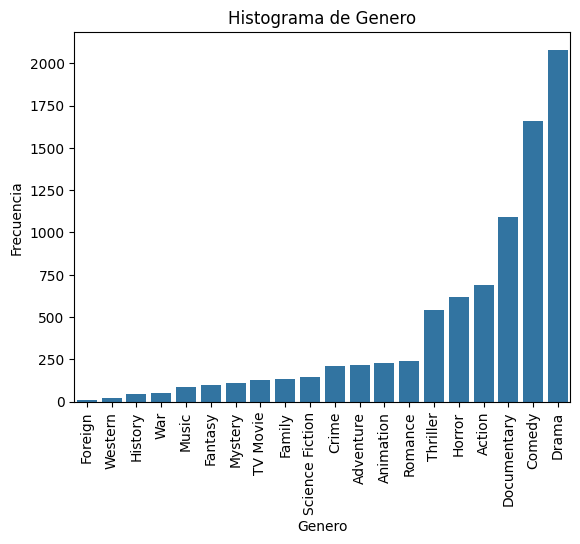

In [20]:
#Se realiza un histograma de frecuencias de genero
sns.barplot(x="genero", y="count", data=e, )  # Grafico de barras votos promedio por genero
plt.title("Histograma de Genero")
plt.xlabel("Genero")
plt.xticks(rotation=90)
plt.ylabel("Frecuencia")
plt.show()

De acuerdo con este EDA se pueden ver los siguientes datos importantes a cerca de las películas:
1. Los valores budget y revenue se encuentran bastante dispersos, estás variables tienen una relación lineal, las peliculas con valores más altos de budget tienen valores altos de revenue
2. El genero con más puntaje promedio es Animation
3. El genero Documentary se encuentra entre los generos con mejores puntajes promedios, pero no tienen valores altos ni de budget ni revenue
4. El genero con mayor numero de películas es Drama
5. Las palabras más populares en los titulos de las peliculas son:LOVE,MAN GIRL, DAY 

# Extracción de datos para el sistema  de recomendación
Realizaremos un nuevo nuevo archivo csv para ser consumido por la función "recomendación" con las películas en estado realesed, este archivo solo tendrá las siguientes columnas:  title/vote_average/vote_count/popularity/genero




In [ ]:
movies.info()

In [ ]:
#Seleccion de columnas para el nuevo dataset a usar en el sistema de recomendación
movies_recomendación = movies[["title","genre_1_name", "vote_average", "vote_count", "popularity", "release_year"]]
print(movies_recomendación.columns)
print(movies_recomendación.__len__())

In [ ]:
#Eliminamos los campos nulos del dataset para que funcione el sistema de recomendación
movies_recomendación.dropna(subset= ["title", "genre_1_name"], inplace= True)
movies_recomendación.__len__()

In [ ]:
#Transformar los datos a tipo string
movies["title"] = movies["title"].astype("string")
movies["genre_1_name"] = movies["genre_1_name"].astype("string")

In [ ]:
movi

In [ ]:
#Para facilitar el despliegue del sistema de recomendación filtramos los datos por las películas estrenadas después del 2010
#movies_recomendación = movies_recomendación[movies_recomendación["release_year"] >= 2010]
#movies_recomendación.__len__()

In [ ]:
#Creamos el nuevo csv a usar para el sistema de recomendación
#movies_recomendación.to_csv(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Laboratorios Individual\Laboratorio 1\Solucion Laboratorio 1\Datasets\movies_recomendación.csv", index=False)